In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import io 


In [2]:
from google.colab import files
up = files.upload()

Saving crime_data.csv to crime_data.csv


In [3]:

data1 = pd.read_csv(io.StringIO(up['crime_data.csv'].decode('utf-8')))
data1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
data=data1.drop(columns=['Unnamed: 0'])
data

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


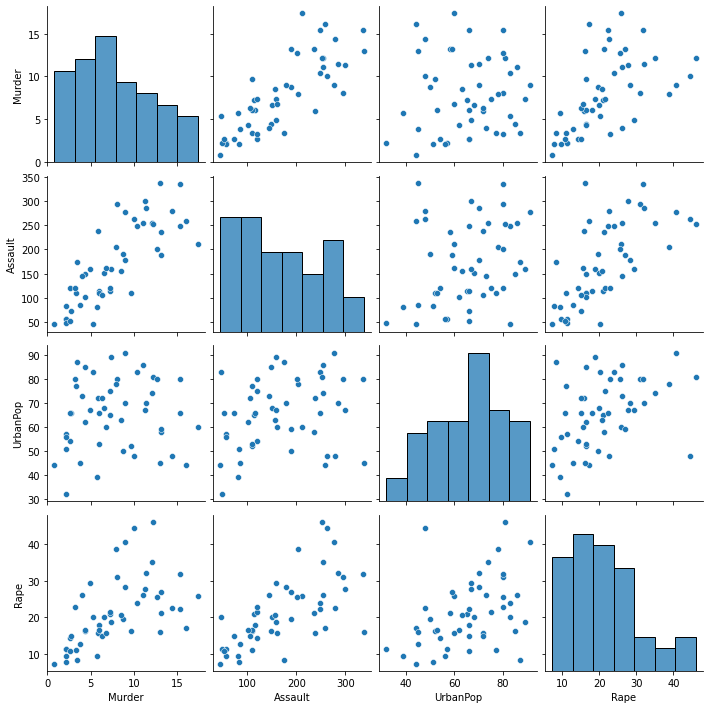

In [6]:
sns.pairplot(data)

In [7]:
data.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [8]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [9]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(data)

In [10]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


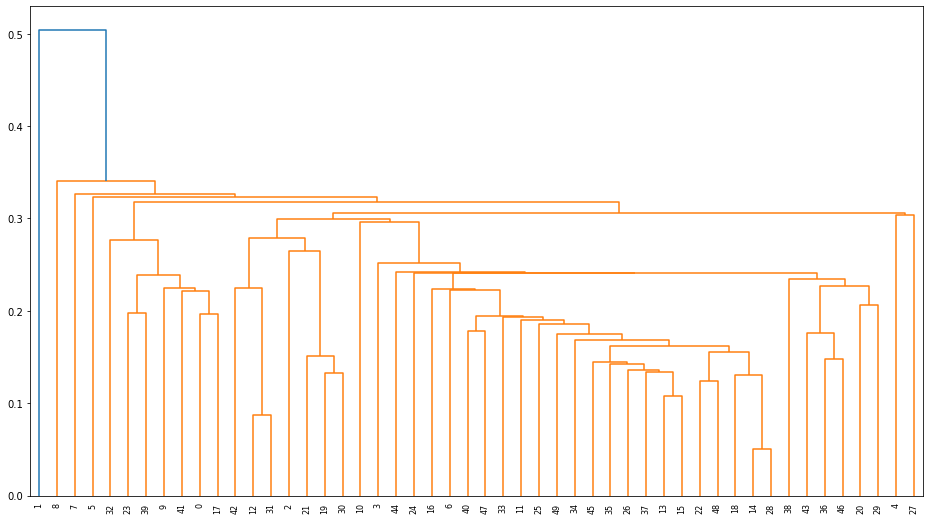

In [11]:
# create dendrogram
plt.figure(figsize=(16,9))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

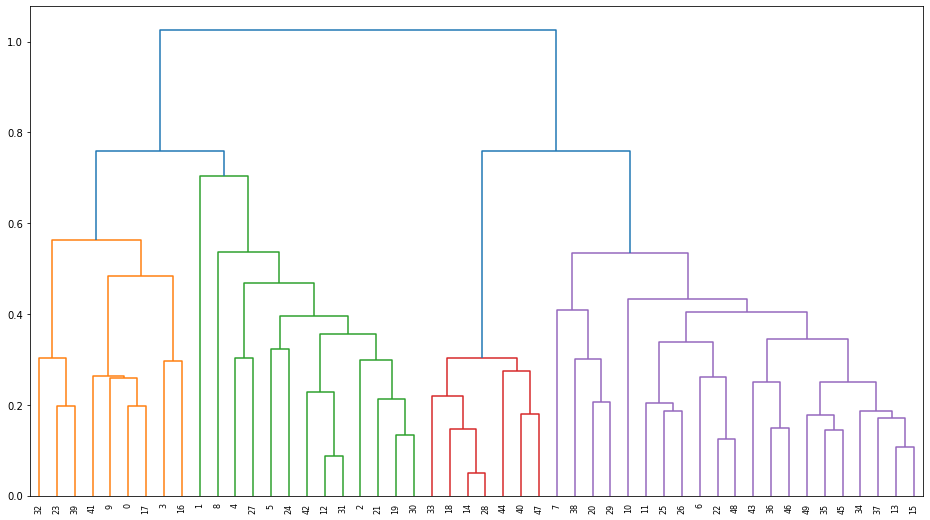

In [12]:
# create dendrogram
plt.figure(figsize=(16,9))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='weighted'))

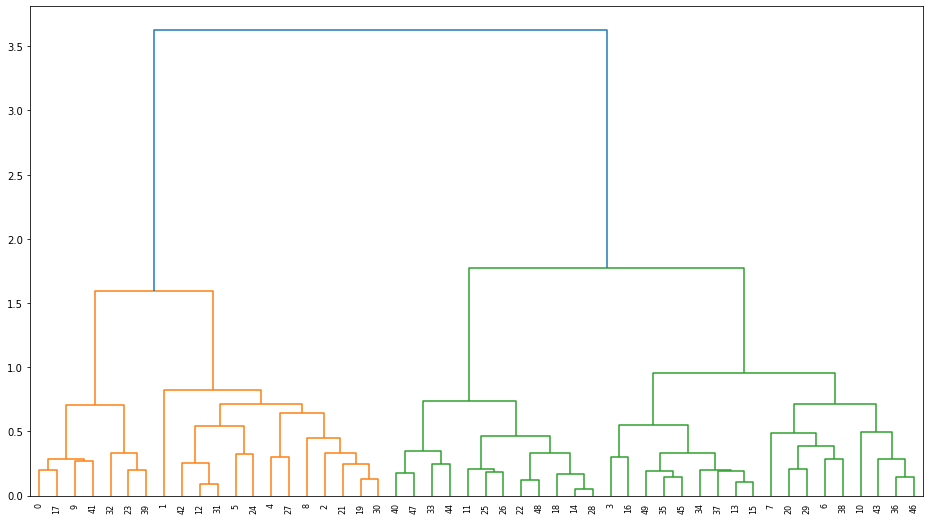

In [13]:
# create dendrogram
plt.figure(figsize=(16,9))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))

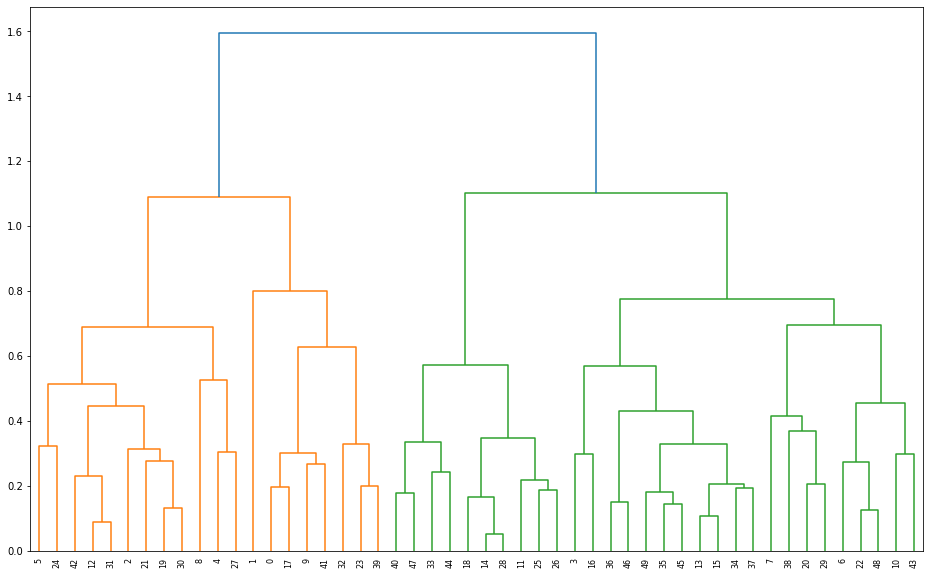

In [14]:
# create dendrogram
# we can also use other linkage type such as 'average', 'median', 'centroid'.
plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [15]:
#We can try with 5-6 clusters.

In [16]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
#as higher values were giving unbalanced distribution, we will go with clusters=3.

In [17]:
y_hc = hc.fit_predict(df_norm)
z = pd.DataFrame(y_hc,columns=['Clusters'])


In [18]:
z.value_counts()

Clusters
0           20
1           20
2           10
dtype: int64

In [19]:
df_norm['clusterid'] = z
df_norm

,Murder,Assault,UrbanPop,Rape,clusterid
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,0
2,0.439759,0.852740,0.813559,0.612403,0
3,0.481928,0.496575,0.305085,0.315245,1
4,0.493976,0.791096,1.000000,0.860465,0
5,0.427711,0.544521,0.779661,0.811370,0
6,0.150602,0.222603,0.762712,0.098191,1
7,0.307229,0.660959,0.677966,0.219638,1
8,0.879518,0.993151,0.813559,0.635659,0
9,1.000000,0.568493,0.474576,0.478036,0


In [20]:
df_norm.sort_values('clusterid')

,Murder,Assault,UrbanPop,Rape,clusterid
0,0.746988,0.654110,0.440678,0.359173,0
42,0.716867,0.534247,0.813559,0.470284,0
41,0.746988,0.489726,0.457627,0.506460,0
39,0.819277,0.801370,0.271186,0.392765,0
32,0.734940,1.000000,0.220339,0.227390,0
31,0.620482,0.715753,0.915254,0.485788,0
30,0.638554,0.821918,0.644068,0.640827,0
27,0.686747,0.708904,0.830508,1.000000,0
23,0.921687,0.732877,0.203390,0.253230,0
21,0.680723,0.719178,0.711864,0.718346,0


In [21]:
#Trying another with linkage 'weighted'.
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [22]:
y_hc = hc.fit_predict(df_norm)
z = pd.DataFrame(y_hc,columns=['Clusters'])


In [23]:
z.value_counts()

Clusters
1           20
3           12
2           10
0            8
dtype: int64

In [24]:
df_norm['clusterid'] = z
df_norm

,Murder,Assault,UrbanPop,Rape,clusterid
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,0
2,0.439759,0.852740,0.813559,0.612403,3
3,0.481928,0.496575,0.305085,0.315245,1
4,0.493976,0.791096,1.000000,0.860465,3
5,0.427711,0.544521,0.779661,0.811370,3
6,0.150602,0.222603,0.762712,0.098191,1
7,0.307229,0.660959,0.677966,0.219638,1
8,0.879518,0.993151,0.813559,0.635659,3
9,1.000000,0.568493,0.474576,0.478036,0


In [25]:
df_norm.sort_values('clusterid')

,Murder,Assault,UrbanPop,Rape,clusterid
0,0.746988,0.654110,0.440678,0.359173,0
17,0.879518,0.698630,0.576271,0.385013,0
23,0.921687,0.732877,0.203390,0.253230,0
32,0.734940,1.000000,0.220339,0.227390,0
39,0.819277,0.801370,0.271186,0.392765,0
9,1.000000,0.568493,0.474576,0.478036,0
1,0.554217,0.746575,0.271186,0.961240,0
41,0.746988,0.489726,0.457627,0.506460,0
43,0.144578,0.256849,0.813559,0.403101,1
38,0.156627,0.441781,0.932203,0.025840,1


# K-Means

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [27]:
url = 'https://raw.githubusercontent.com/abhishekgd96/Clustering/main/crime_data.csv'
data1 = pd.read_csv(url)
data1


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [28]:
data=data1.drop(columns=['Unnamed: 0'])
data

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [29]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data.iloc[:,1:])

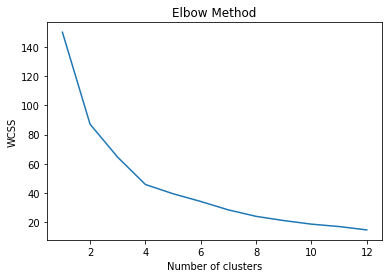

In [30]:
#finding optimum number of clusters
# import warnings 
# warnings.filterwarnings(action= 'ignore')

wcss = []
for i in range(1, 13):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 13), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
clusters_new = KMeans(5, random_state=42)
clusters_new.fit(scaled_df)

KMeans(n_clusters=5, random_state=42)

In [32]:
clusters_new.labels_

array([1, 1, 3, 1, 3, 3, 0, 4, 3, 1, 0, 2, 3, 4, 2, 4, 2, 1, 2, 3, 0, 3,
       2, 1, 4, 2, 2, 3, 2, 0, 3, 3, 1, 2, 4, 4, 4, 0, 0, 1, 2, 4, 4, 0,
       2, 4, 4, 2, 2, 4], dtype=int32)

In [33]:
data['clusterid_new'] = clusters_new.labels_

In [34]:
clusters_new.cluster_centers_

array([[-0.57371376,  1.13872696, -0.556561  ],
       [ 0.99684758, -0.91874788,  0.25673387],
       [-1.11783581, -0.93954982, -0.97657842],
       [ 1.20775648,  0.93933509,  1.30475377],
       [-0.12537362,  0.18330759,  0.12416982]])

In [35]:
data.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,4.757143,123.428571,81.857143,16.071429
1,1,13.537500,253.000000,52.375000,23.612500
2,2,3.600000,78.538462,52.076923,12.176923
3,3,10.890000,270.400000,79.000000,33.330000
4,4,7.675000,160.416667,68.166667,22.383333


In [36]:
data

,Murder,Assault,UrbanPop,Rape,clusterid_new
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,3
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,4
8,15.4,335,80,31.9,3
9,17.4,211,60,25.8,1


# DB_Scan

In [37]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [38]:
url = 'https://raw.githubusercontent.com/abhishekgd96/Clustering/main/crime_data.csv'
data1 = pd.read_csv(url)
data1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [39]:
data=data1.drop(columns=['Unnamed: 0'])
data

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [40]:
stscaler = StandardScaler().fit(data)
X = stscaler.transform(data)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [41]:
#Eps has to be adjusted in such a way that that its not either very small or very large at the same time. 
#We also need to keep in mind that there can't be more than 20-40% of data points in any single cluster mostly.
#Noise has to be less than 30% of the data.

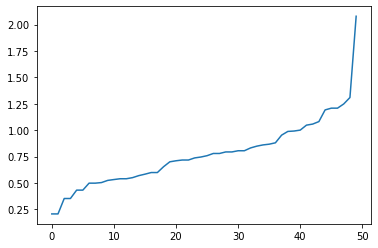

In [42]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [43]:
#K-Distance graph moves sharply up when distance is more than 1.25, hence we can use 1.25 as eps.

In [44]:
dbscan = DBSCAN(eps=1.25, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=1.25)

In [45]:
dbscan.labels_

array([ 0, -1,  1,  2, -1,  1,  2,  2, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2, -1,  2,  2,  2, -1,  2,  2,  1,  1, -1,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2])

In [46]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [47]:
cl.value_counts()

cluster
 2         32
 1          7
-1          6
 0          5
dtype: int64

In [48]:
data = pd.concat([data,cl],axis=1)
data

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,2
7,5.9,238,72,15.8,2
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,0
